# canto de aves
### En este programa vamos a analizar el canto de aves e investigar el comportamiento de su señal a traves de TDA.
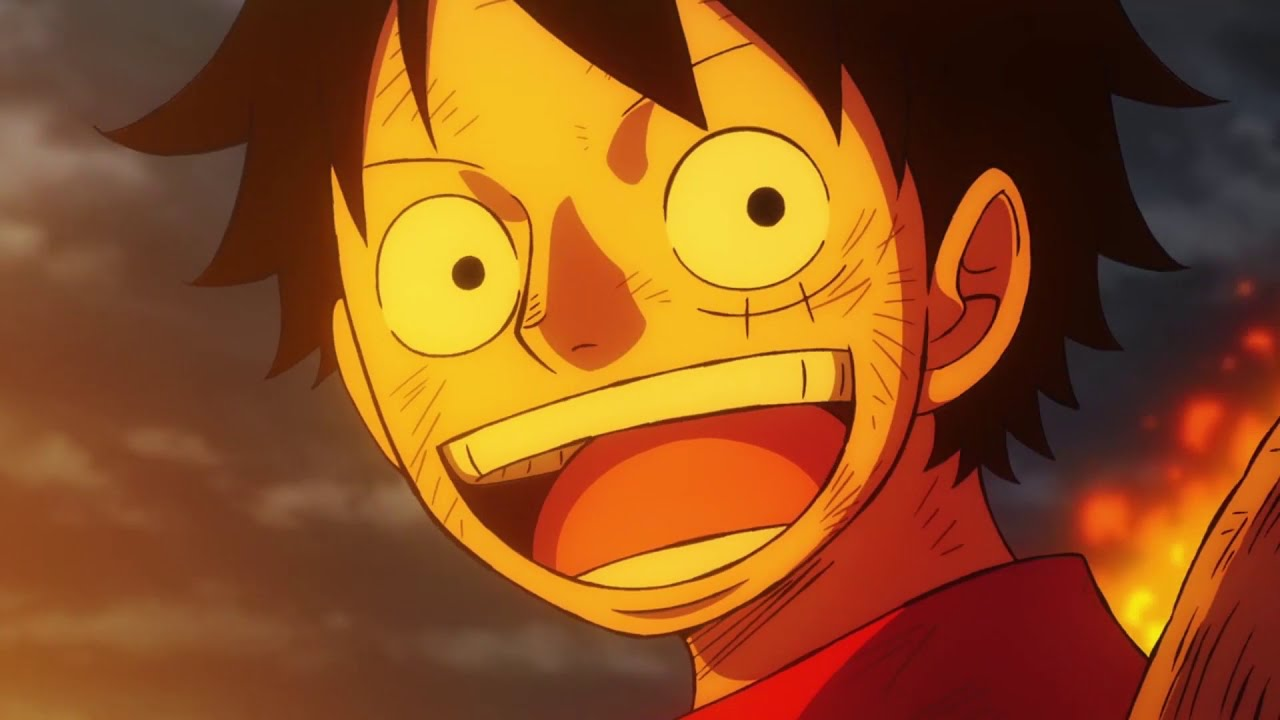



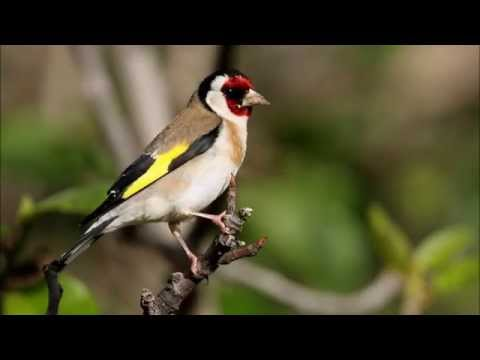

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo("bH_q_gESPhU", width=300, height=200)

In [19]:
#vamos a abrir las librerias necesarias para este codigo

import math
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

##Do all of the imports and setup inline plotting
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.interpolate import InterpolatedUnivariateSpline
from mpl_toolkits.mplot3d import Axes3D


from ripser import ripser
from persim import plot_diagrams
import scipy.io.wavfile

from IPython.display import clear_output


import glob, os
import scipy.signal as sig
import ipywidgets as widgets


In [20]:
#We open our wave file  
paj = r"C:\Users\feliz\Documents\aprendiendo python rapido\tesis\zfy34.wav"

#the user can interact with the content in each audio
print('Zebra Finch lungs pression audio')
ipd.Audio(paj)


Zebra Finch lungs pression audio


In [21]:
##Do all of the imports and setup inline plotting
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.interpolate import InterpolatedUnivariateSpline

from ripser import ripser
from persim import plot_diagrams
import scipy.io.wavfile

from IPython.display import clear_output

def getSlidingWindow(x, dim, Tau, dT):
    """
    Return a sliding window of a time series,
    using arbitrary sampling.  Use linear interpolation
    to fill in values in windows not on the original grid
    Parameters
    ----------
    x: ndarray(N)
        The original time series
    dim: int
        Dimension of sliding window (number of lags+1)
    Tau: float
        Length between lags, in units of time series
    dT: float
        Length between windows, in units of time series
    Returns
    -------
    X: ndarray(N, dim)
        All sliding windows stacked up
    """
    N = len(x)
    NWindows = int(np.floor((N-dim*Tau)/dT))
    if NWindows <= 0:
        print("Error: Tau too large for signal extent")
        return np.zeros((3, dim))
    X = np.zeros((NWindows, dim))
    spl = InterpolatedUnivariateSpline(np.arange(N), x)
    for i in range(NWindows):
        idxx = dT*i + Tau*np.arange(dim)
        start = int(np.floor(idxx[0]))
        end = int(np.ceil(idxx[-1]))+2
        # Only take windows that are within range
        if end >= len(x):
            X = X[0:i, :]
            break
        X[i, :] = spl(idxx)
    return X

In [22]:
# Load the audio as a waveform
# Store the sampling rate as `sr'
song, sr = librosa.load(paj)

#To display the length of the audio array and sample rate
print(song.shape)
print("Sample Rate:", sr)


(174460,)
Sample Rate: 22050


<IPython.core.display.Javascript object>


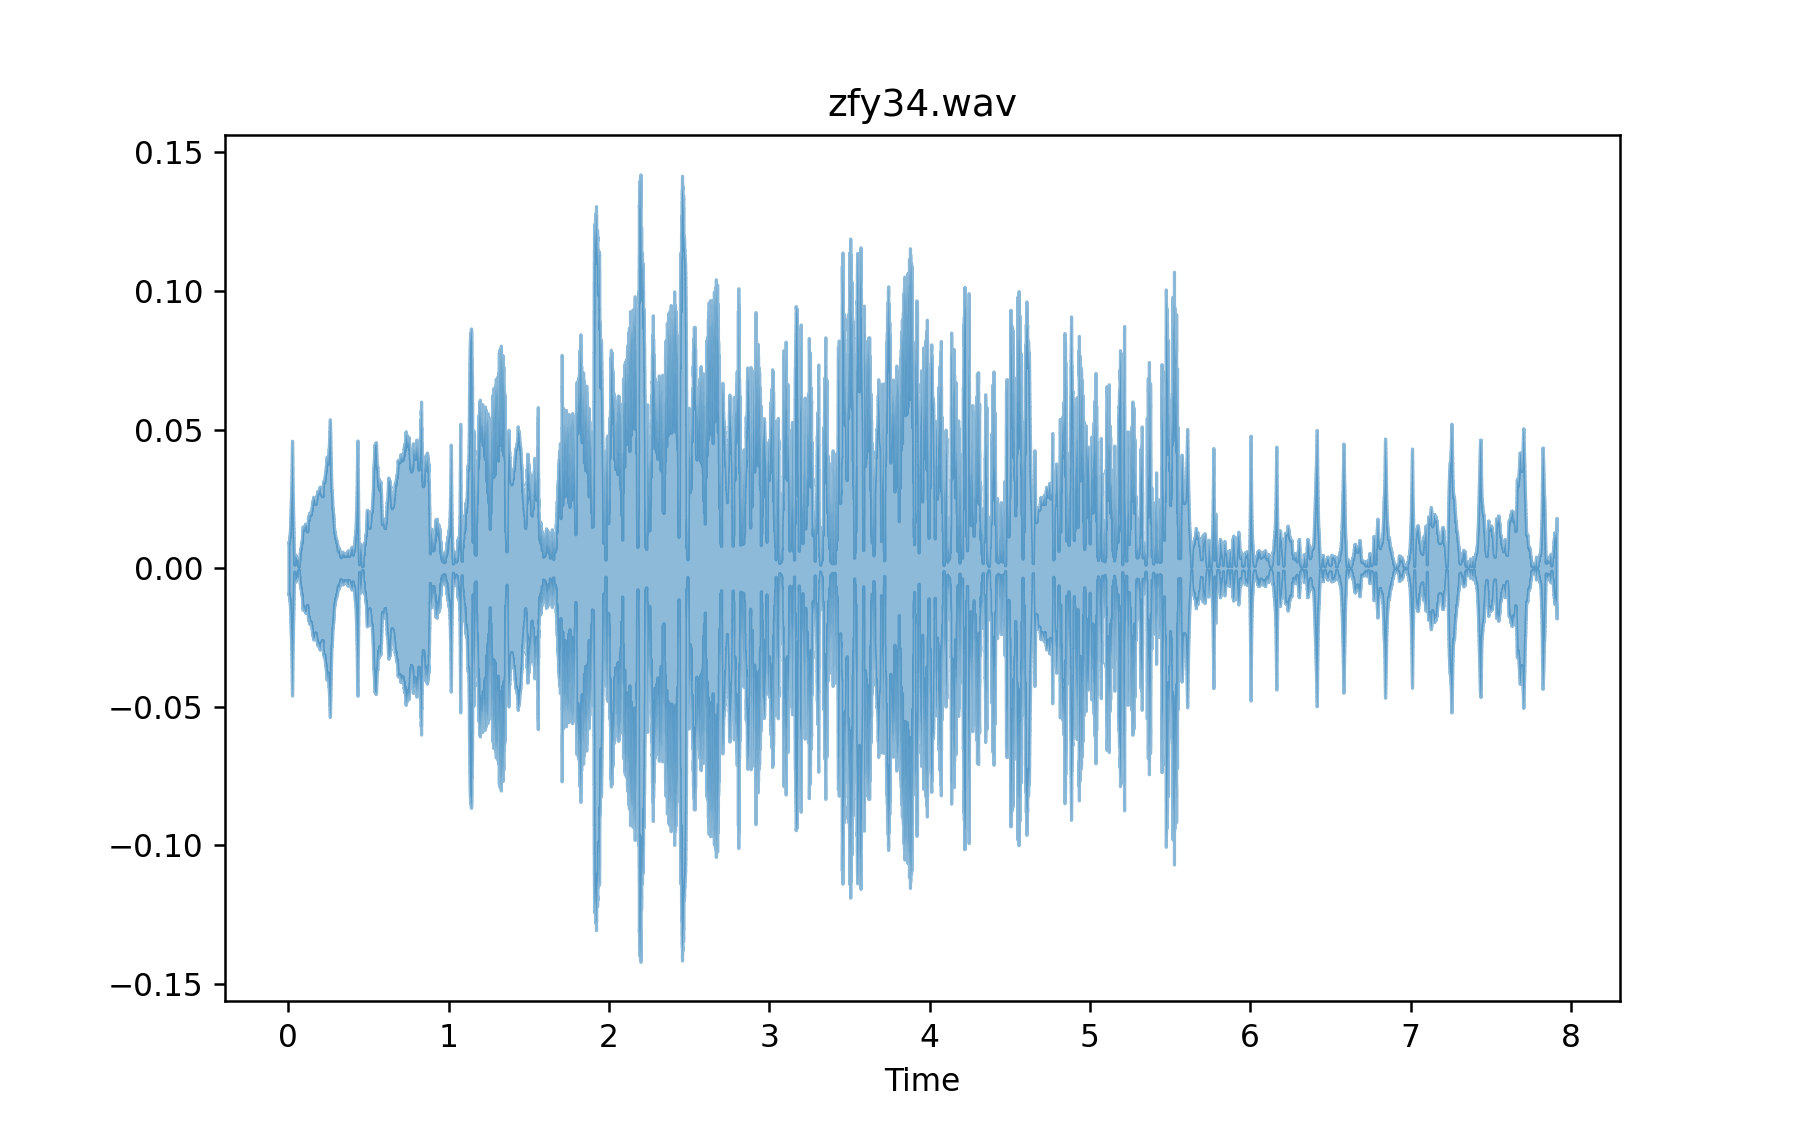

In [23]:
#plotting the audio array with librosa.display.wavplot

plt.figure(figsize=(8, 5))
plt.title('zfy34.wav')
librosa.display.waveshow(song, alpha=0.5, sr=sr)

<IPython.core.display.Javascript object>


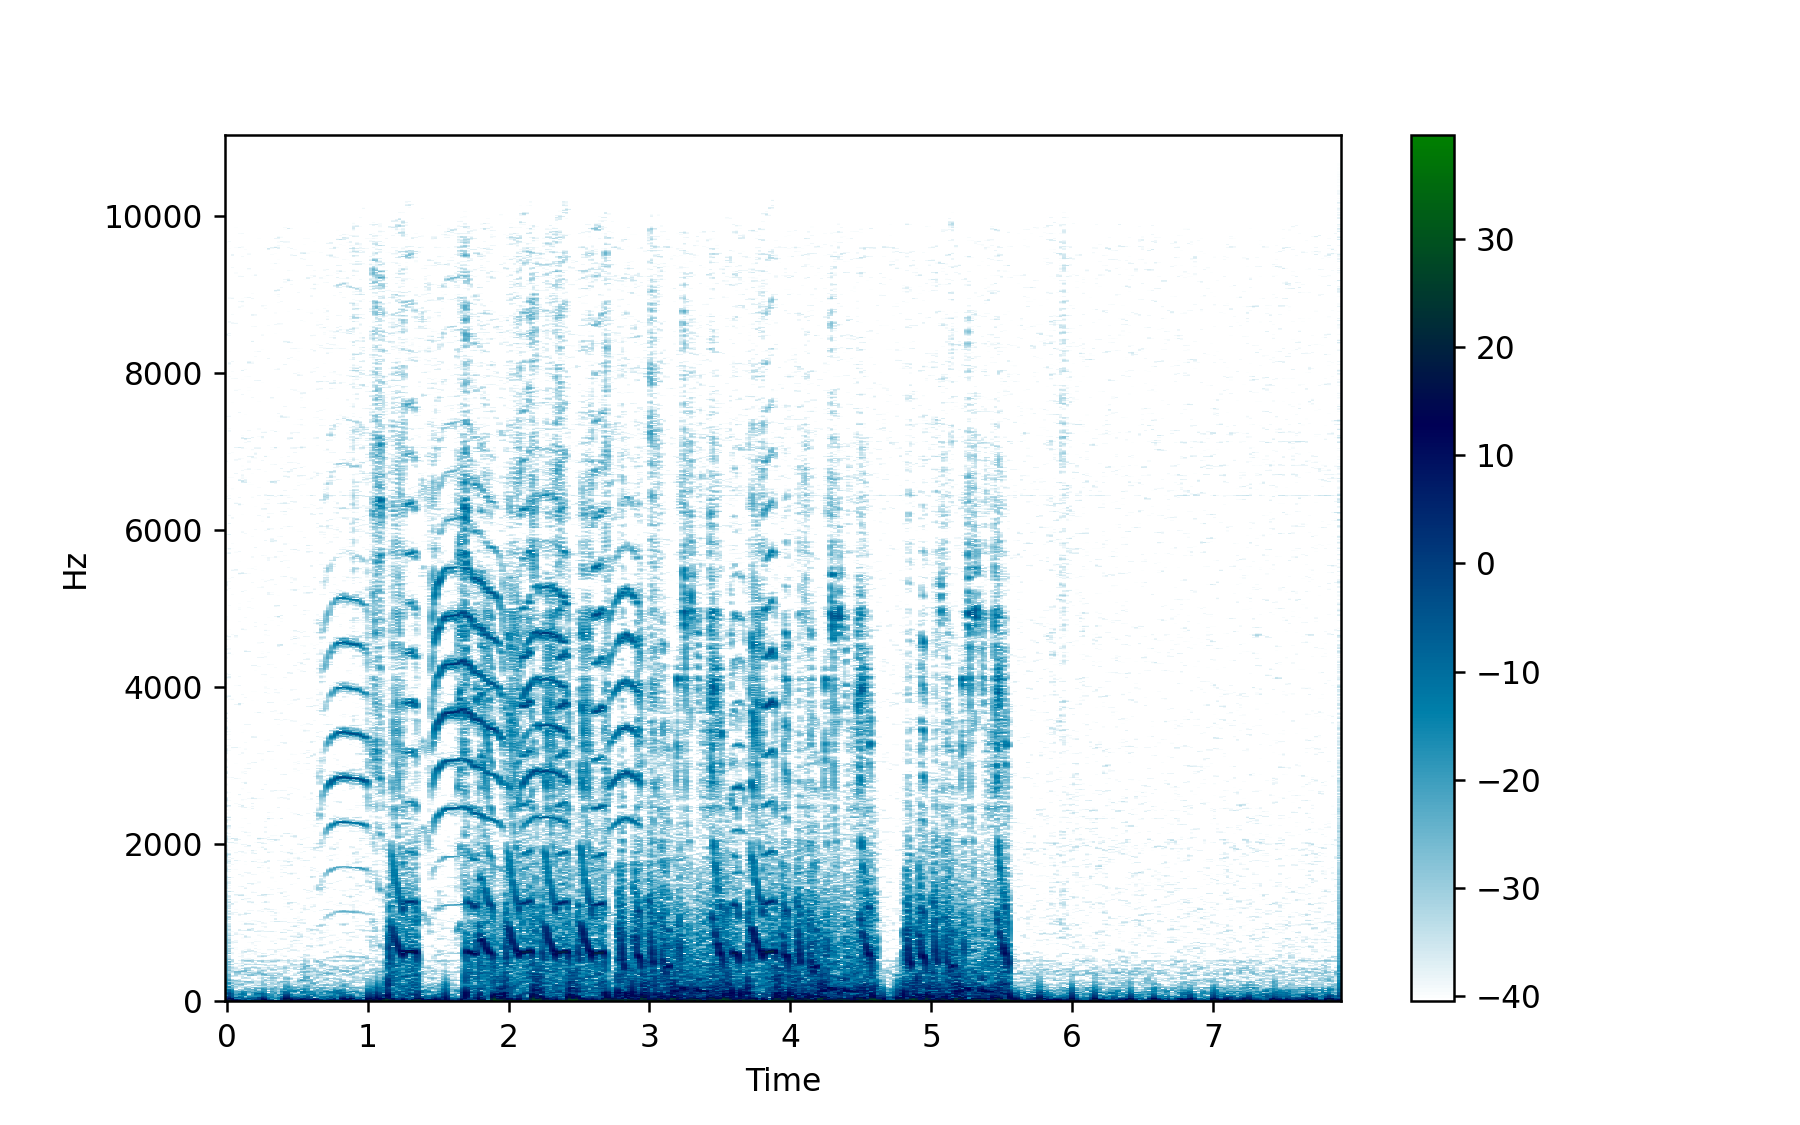

In [24]:
#displaying the spectrogram using librosa.display.specshow
canto = librosa.stft(song)
cantodb = librosa.amplitude_to_db(abs(canto))
plt.figure(figsize=(8, 5))
librosa.display.specshow(cantodb, sr=sr, x_axis='time', y_axis='hz',cmap='ocean_r')
plt.colorbar()

In [25]:


def getSlidingWindow(x, dim, Tau, dT):
    """
    Return a sliding window of a time series,
    using arbitrary sampling.  Use linear interpolation
    to fill in values in windows not on the original grid
    Parameters
    ----------
    x: ndarray(N)
        The original time series
    dim: int
        Dimension of sliding window (number of lags+1)
    Tau: float
        Length between lags, in units of time series
    dT: float
        Length between windows, in units of time series
    Returns
    -------
    X: ndarray(N, dim)
        All sliding windows stacked up
    """
    N = len(x)
    NWindows = int(np.floor((N-dim*Tau)/dT))
    if NWindows <= 0:
        print("Error: Tau too large for signal extent")
        return np.zeros((3, dim))
    X = np.zeros((NWindows, dim))
    spl = InterpolatedUnivariateSpline(np.arange(N), x)
    for i in range(NWindows):
        idxx = dT*i + Tau*np.arange(dim)
        start = int(np.floor(idxx[0]))
        end = int(np.ceil(idxx[-1]))+2
        # Only take windows that are within range
        if end >= len(x):
            X = X[0:i, :]
            break
        X[i, :] = spl(idxx)
    return X

# Bifonacion

### Biphonation refers to the presence of two or more simultaneous frequencies in a signal which are "incommensurate"; that is, their frequencies are linearly independent over the rational numbers.  In other words, the frequencies are "inharmonic.


<ipython-input-26-82421dbc7b3d>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, X = scipy.io.wavfile.read(r"C:\Users\feliz\Documents\aprendiendo python rapido\tesis\zfy34.wav")


<IPython.core.display.Javascript object>


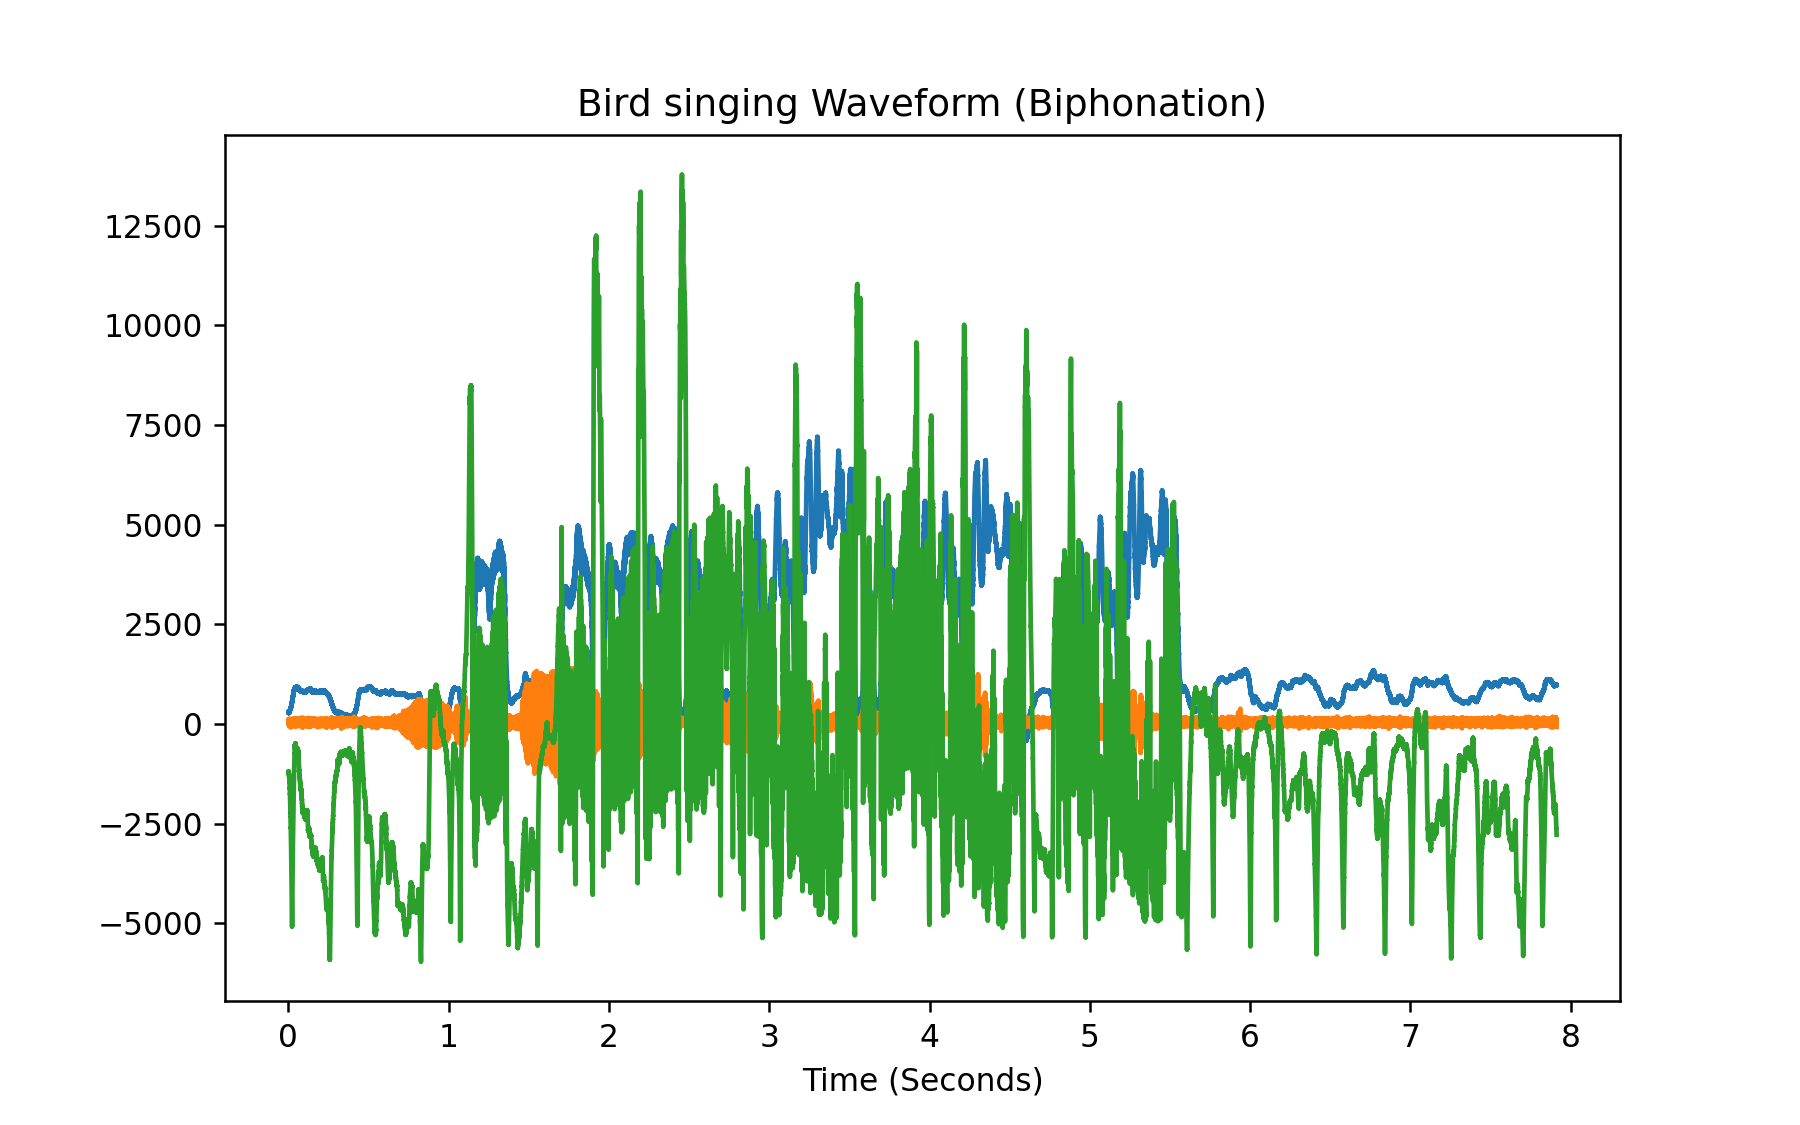

In [26]:
#Read in the audio file.  Fs is the sample rate, and
#X is the audio signal

Fs, X = scipy.io.wavfile.read(r"C:\Users\feliz\Documents\aprendiendo python rapido\tesis\zfy34.wav")

plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(X))/float(Fs), X)
plt.xlabel("Time (Seconds)")
plt.title("Bird singing Waveform (Biphonation)")
plt.show()

#from IPython.display import Audio
# load a remote WAV file
#Audio(r"C:\Users\feliz\Documents\aprendiendo python rapido\machine learning\tesis\zfy34.wav")

In [27]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size and hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)   


def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

# number of frames in amplitude envelope
ae_ave = amplitude_envelope(song, FRAME_SIZE, HOP_LENGTH)
len(ae_ave)

frames = range(len(ae_ave))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

<IPython.core.display.Javascript object>


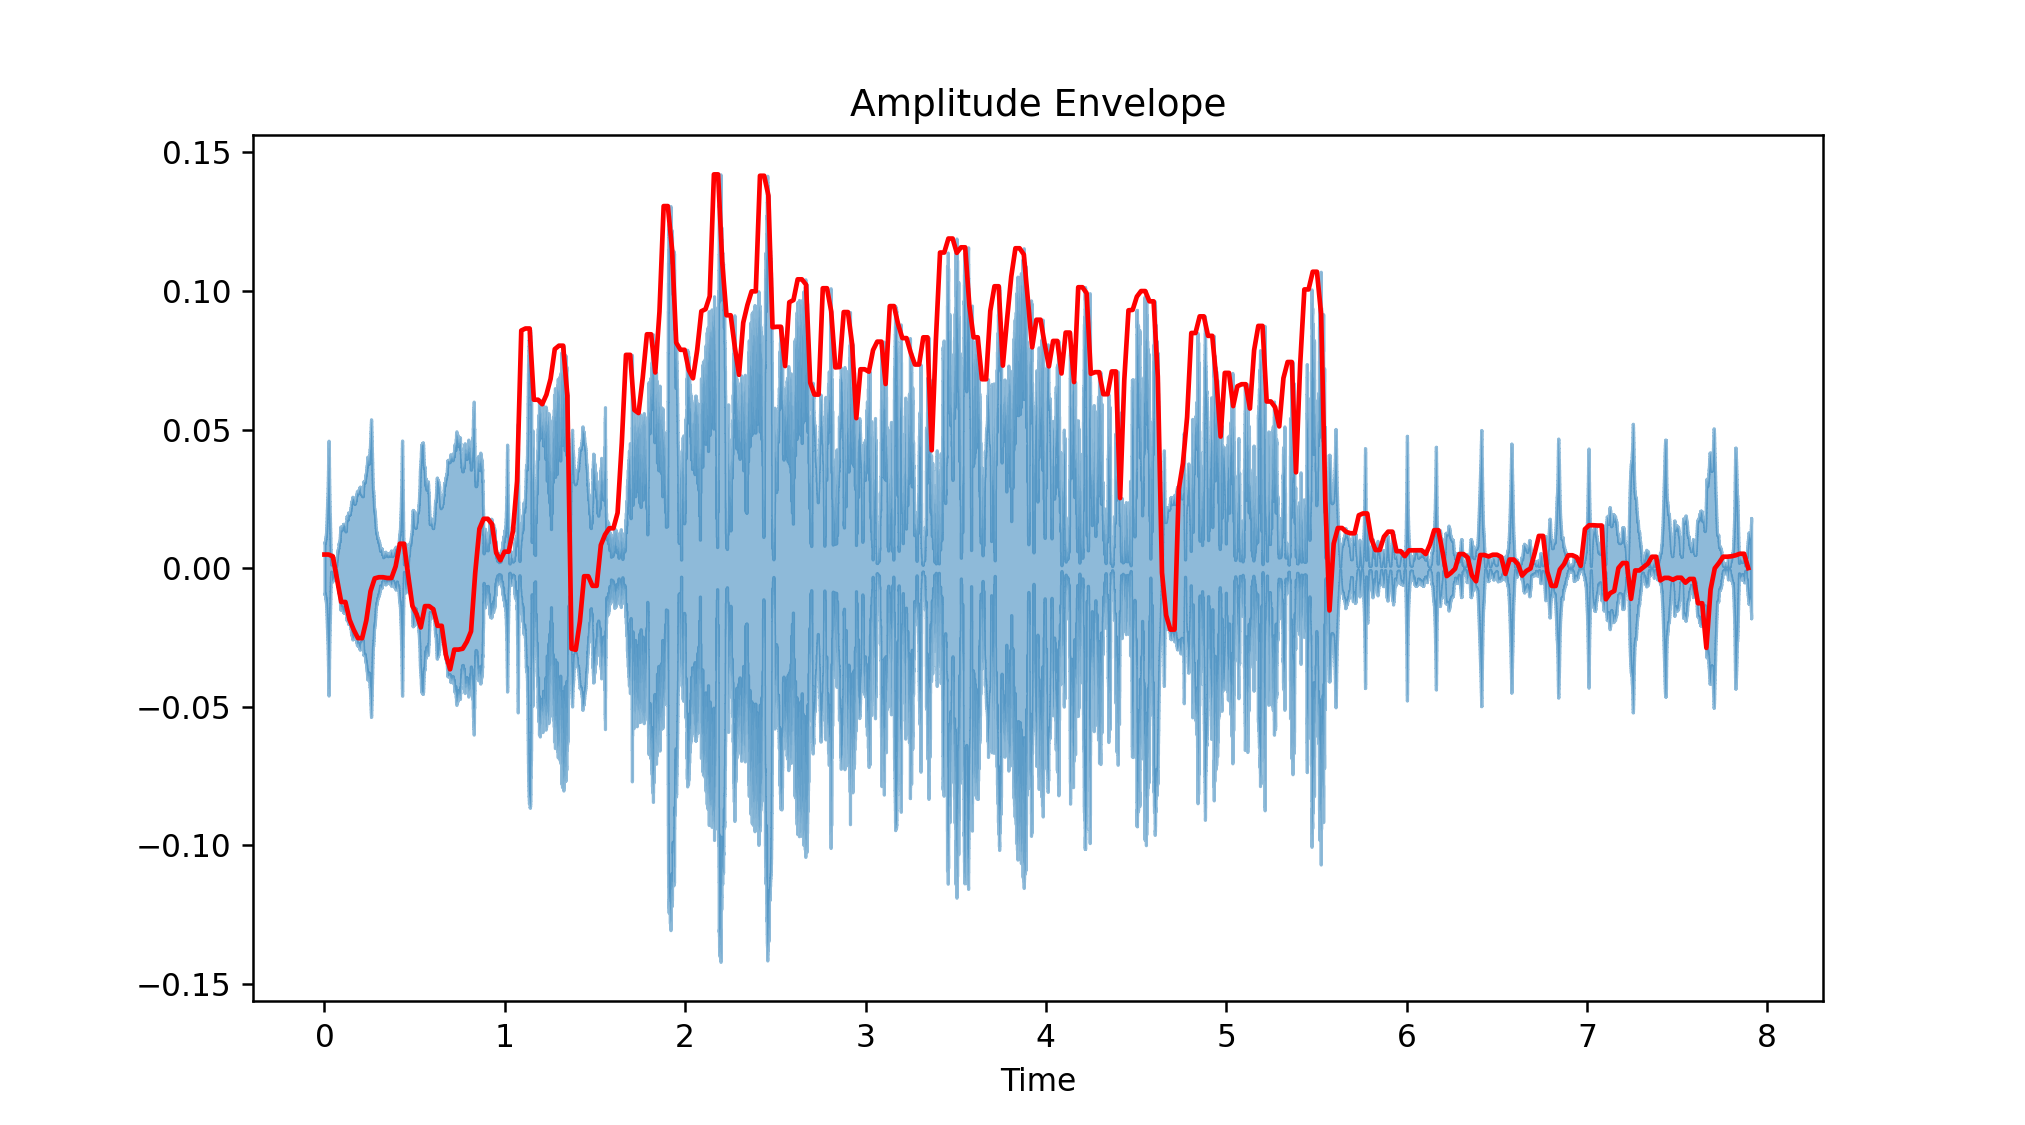

Text(0.5, 1.0, 'Amplitude Envelope')

In [28]:
# amplitude envelope is in red color

plt.figure(figsize=(9, 5))
librosa.display.waveshow(song, alpha=0.5)
plt.plot(t, ae_ave, color="r")
plt.title("Amplitude Envelope")


### ***Now let's do a sliding window with a window length equal to the sample rate over 2, corresponding to the fact that a beat period is a half of a second in this song. We will have to have a large Tau and dT, since there is such a high sampling rate, because otherwise the TDA code will grind to a halt with way too many points. We will also need to set up special sliding window code that skips the spline interpolation step, because this will also be prohibitively slow at this sampling rate. In other words, we will assume that Tau and dT are integers***




In [29]:

#Sliding window code here assumes integer x, dim, and Tau so no interpolation
#is needed (for computational efficiency)
def getSlidingWindowInteger(x, dim, Tau, dT):
    N = len(x)
    NWindows = int(np.floor((N-dim*Tau)/dT)) #The number of windows
    if NWindows <= 0:
        print("Error: Tau too large for signal extent")
        return np.zeros((3, dim))
    X = np.zeros((NWindows, dim)) #Create a 2D array which will store all windows
    idx = np.arange(N)
    for i in range(NWindows):
        #Figure out the indices of the samples in this window
        idxx = np.array(dT*i + Tau*np.arange(dim), dtype=np.int32)
                
        X[i, :] = x[idxx]
    return X



<IPython.core.display.Javascript object>


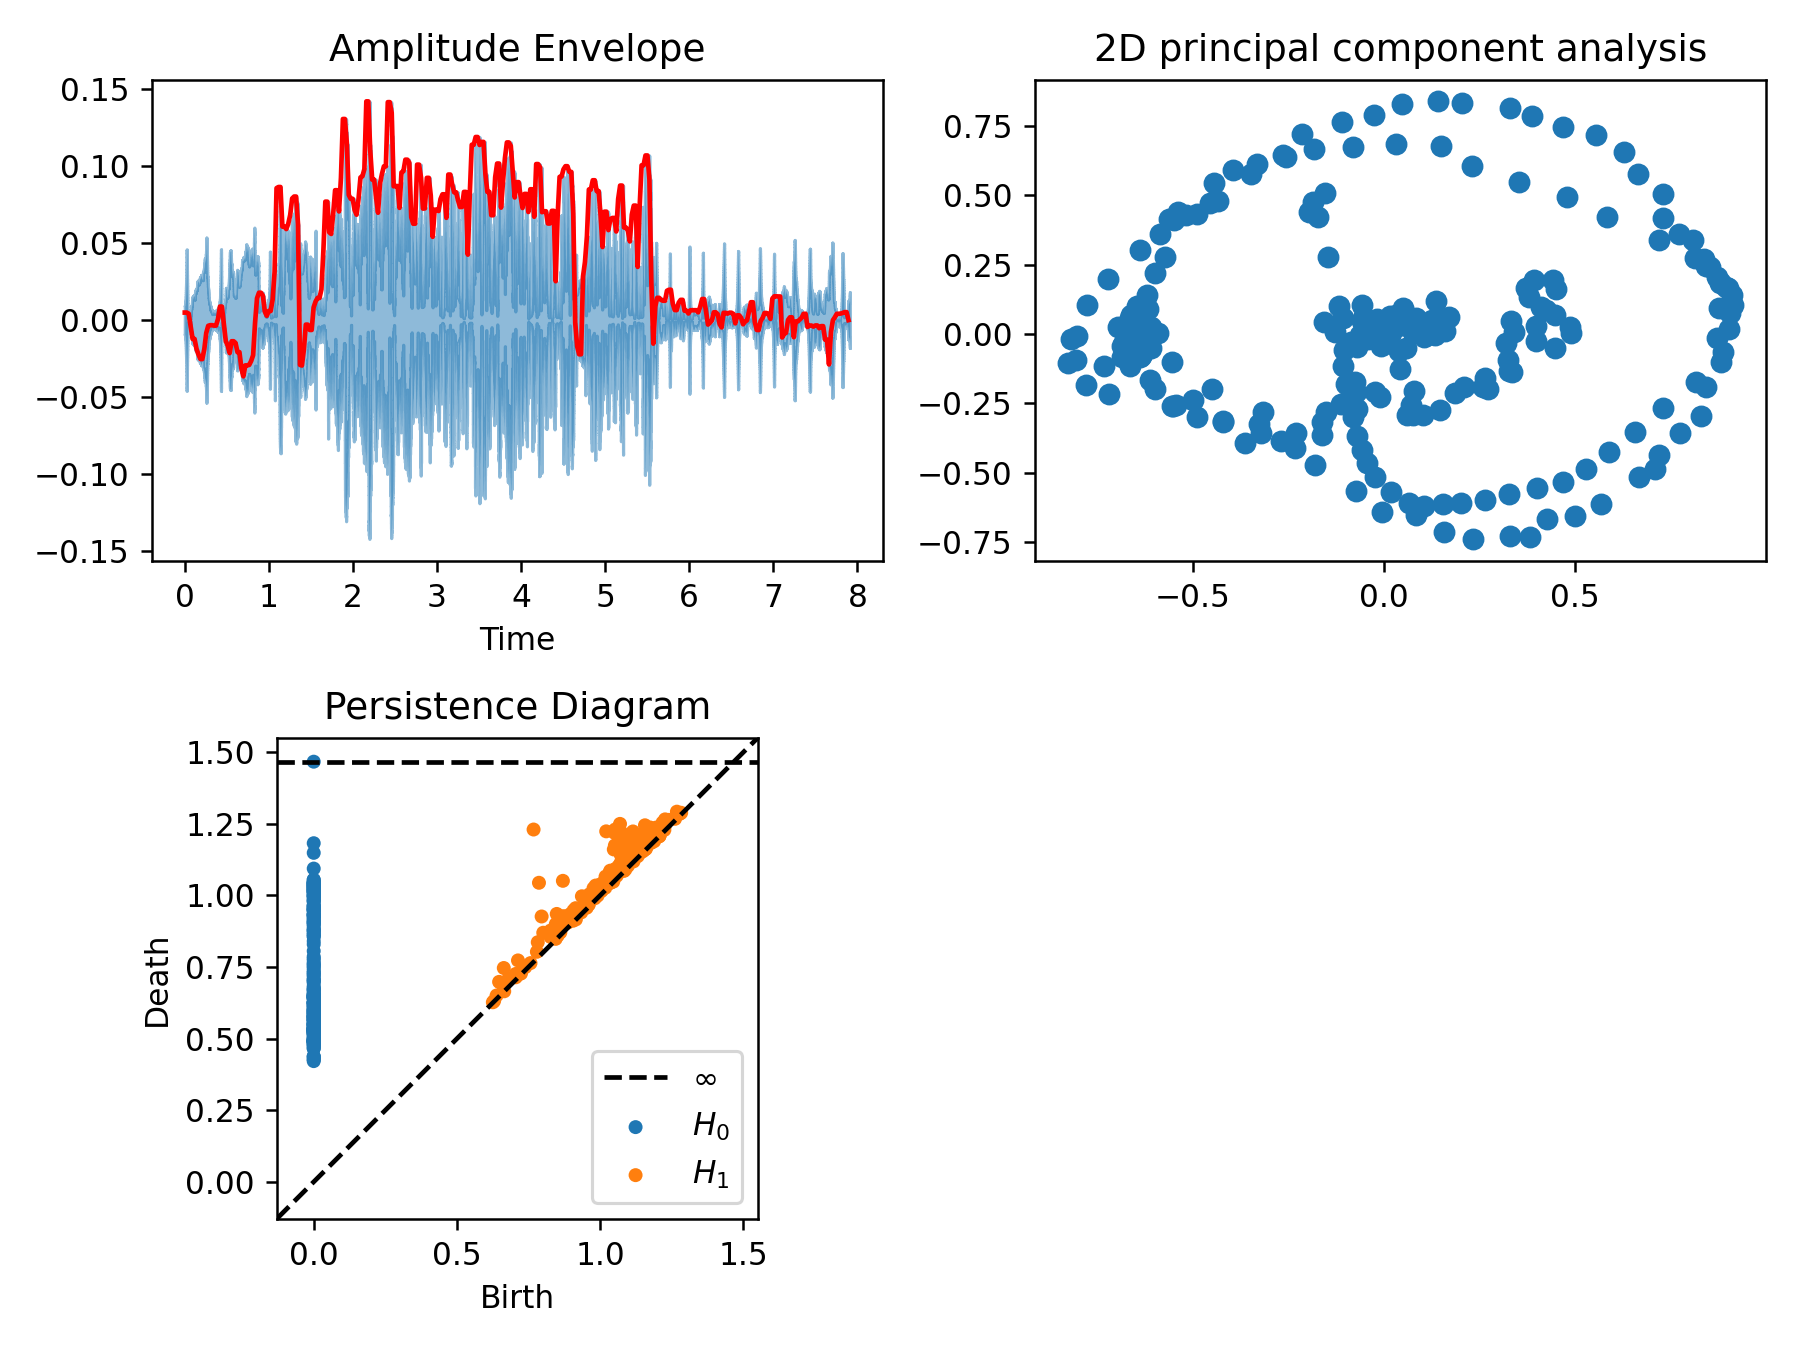

In [30]:
#Tau is the skip between samples in a given window
#sr is the sample rate
#dim is the embedding dimension
#dT is the distace from one window to the next one
dim = round(sr/200)
Tau = 100
dT = sr/100

#Get the sliding window embedding
Y = getSlidingWindowInteger(song[0:sr*3], dim, Tau, dT)
#print("Y.shape = ", Y.shape)

#Mean-center and normalize
Y = Y - np.mean(Y, 1)[:, None]
Y = Y/np.sqrt(np.sum(Y**2, 1))[:, None]


#Do Rips Filtration
PDs = ripser(Y, maxdim=1)['dgms']
pca = PCA()
Z = pca.fit_transform(Y)


#Plot original signal, 2-D projection, and the persistence diagram
fig = plt.figure(figsize=(8, 6))

plt.subplot(221)
librosa.display.waveshow(song, alpha=0.5)
plt.plot(t, ae_ave, color="r")
plt.title("Amplitude Envelope")
    
plt.subplot(222)
plt.title("2D principal component analysis")
plt.scatter(Z[:, 0], Z[:, 1])
plt.subplot(223)
plot_diagrams(PDs)
plt.title("Persistence Diagram")

plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


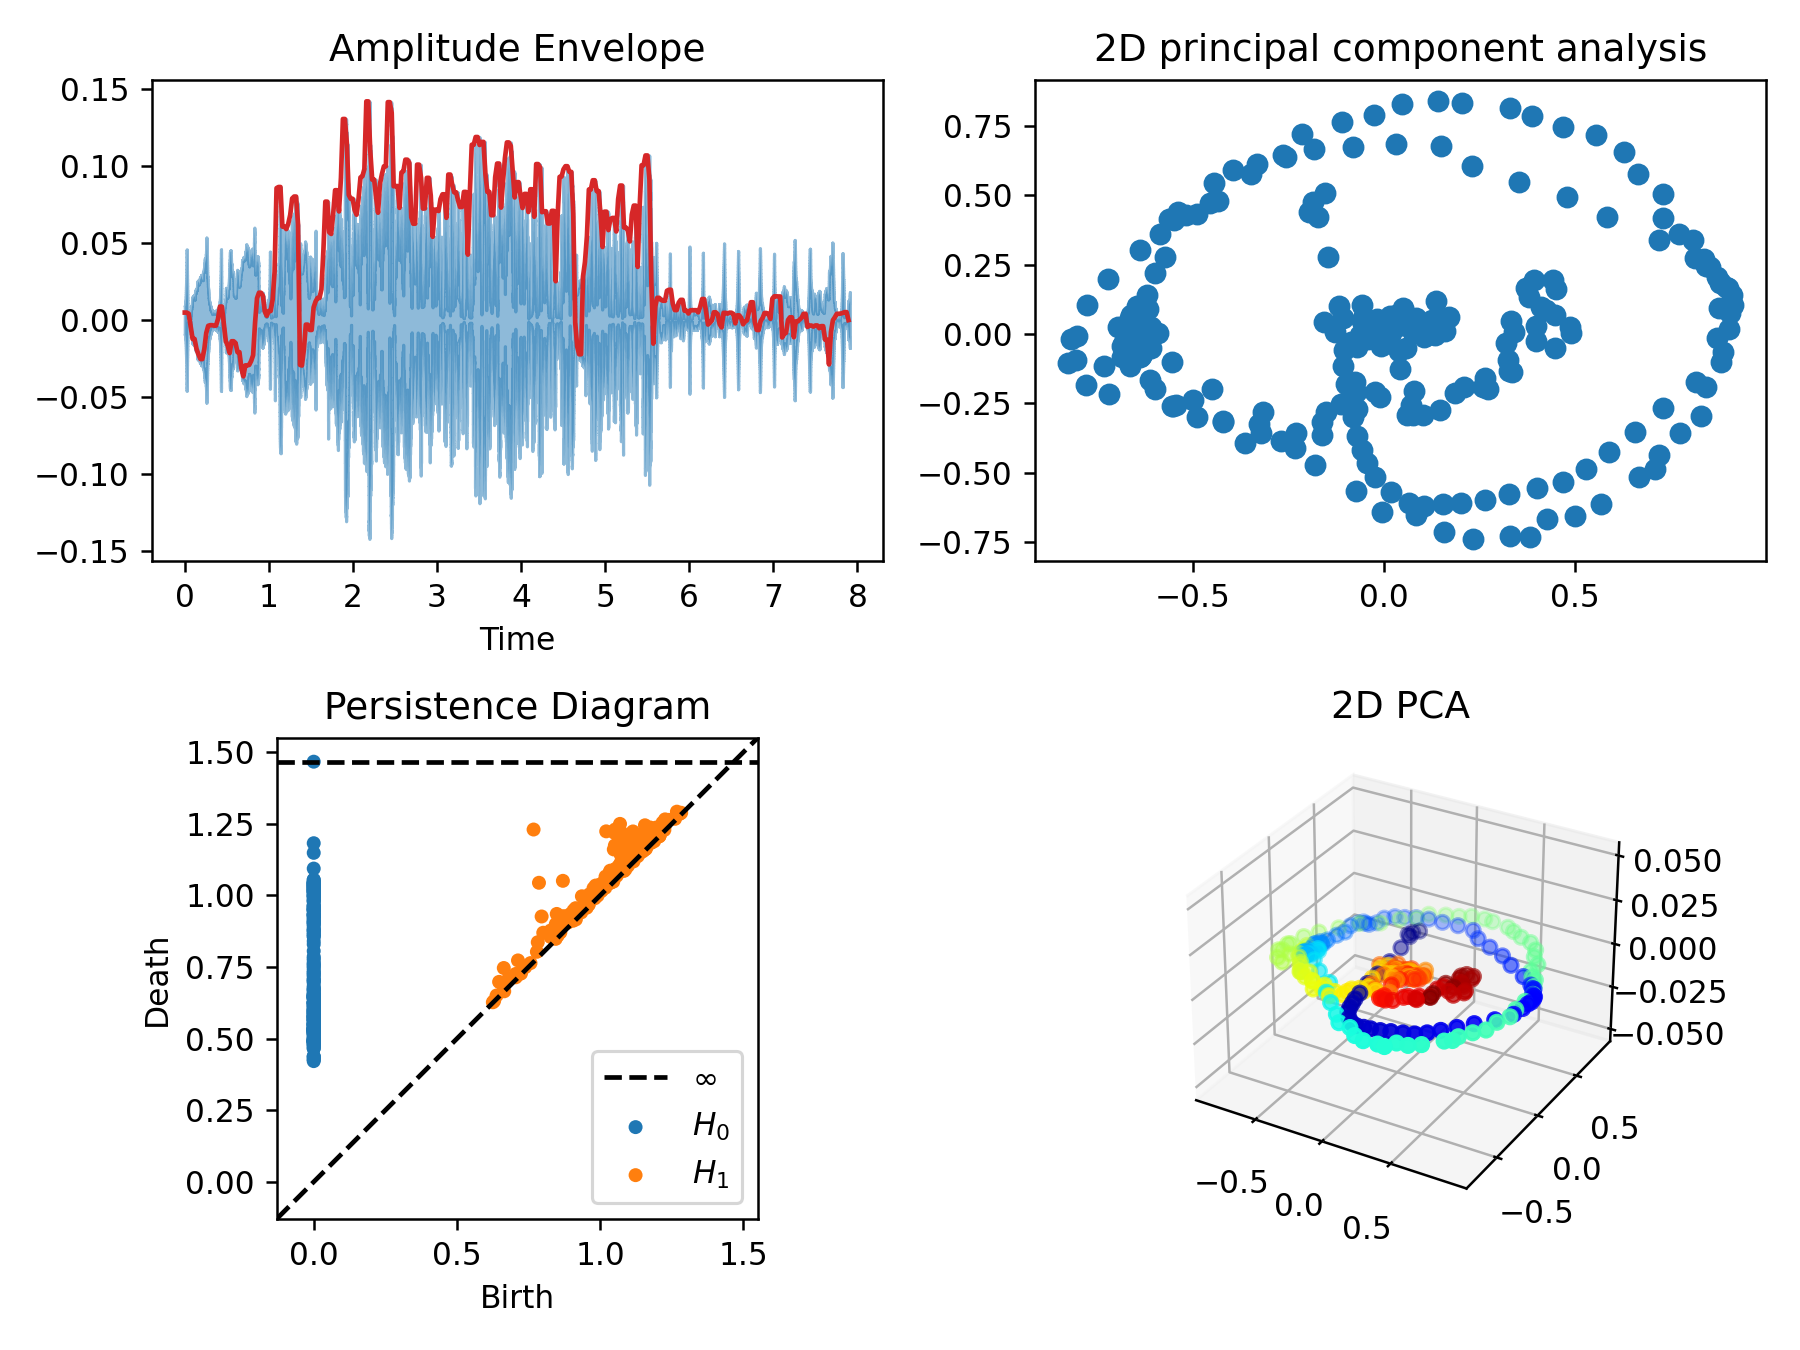

In [43]:
#Note that dim*Tau here spans a half a second of audio, 
#since Fs is the sample rate
dim = round(sr/200)
Tau = 100
dT = sr/100

#Get the sliding window embedding
Y = getSlidingWindowInteger(song[0:sr*3], dim, Tau, dT)
#print("Y.shape = ", Y.shape)

#Mean-center and normalize
Y = Y - np.mean(Y, 1)[:, None]
Y = Y/np.sqrt(np.sum(Y**2, 1))[:, None]


#Do Rips Filtration
PDs = ripser(Y, maxdim=1)['dgms']
pca = PCA()
Z = pca.fit_transform(Y)


#Plot original signal, 2-D projection, and the persistence diagram
fig = plt.figure(figsize=(8, 6))

plt.subplot(221)
librosa.display.waveshow(song, alpha=0.5)
#k=plt.get_cmap('jet')
#plt.plot(t, ae_ave, color="r")
plt.plot(t, ae_ave, color='tab:red')
plt.title("Amplitude Envelope")

    
ax=plt.subplot(222)
ax.set_title("2D principal component analysis")
ax.scatter(Z[:, 0], Z[:, 1])


plt.subplot(223)
plot_diagrams(PDs)
plt.title("Persistence Diagram")

ax=plt.subplot(224,projection = '3d')
c = plt.get_cmap('jet')
C = c(np.array(np.round(np.linspace(0, 255, Y.shape[0])), dtype=np.int32))
C = C[:, 0:3]
ax.set_title("2D PCA")
ax.scatter(Z[:, 0], Z[:, 1],c=C)



plt.tight_layout()
plt.show()



In [35]:
ax=plt.subplot(224,projection = '3d')
c = plt.get_cmap('jet')
C = c(np.array(np.round(np.linspace(0, 255, Y.shape[0])), dtype=np.int32))
C = C[:, 0:3]
ax.set_title("2D PCA")
ax.scatter(Z[:, 0], Z[:, 1],c=C)

plt.tight_layout()
plt.show()

110


Y.shape =  (299, 110)


<IPython.core.display.Javascript object>


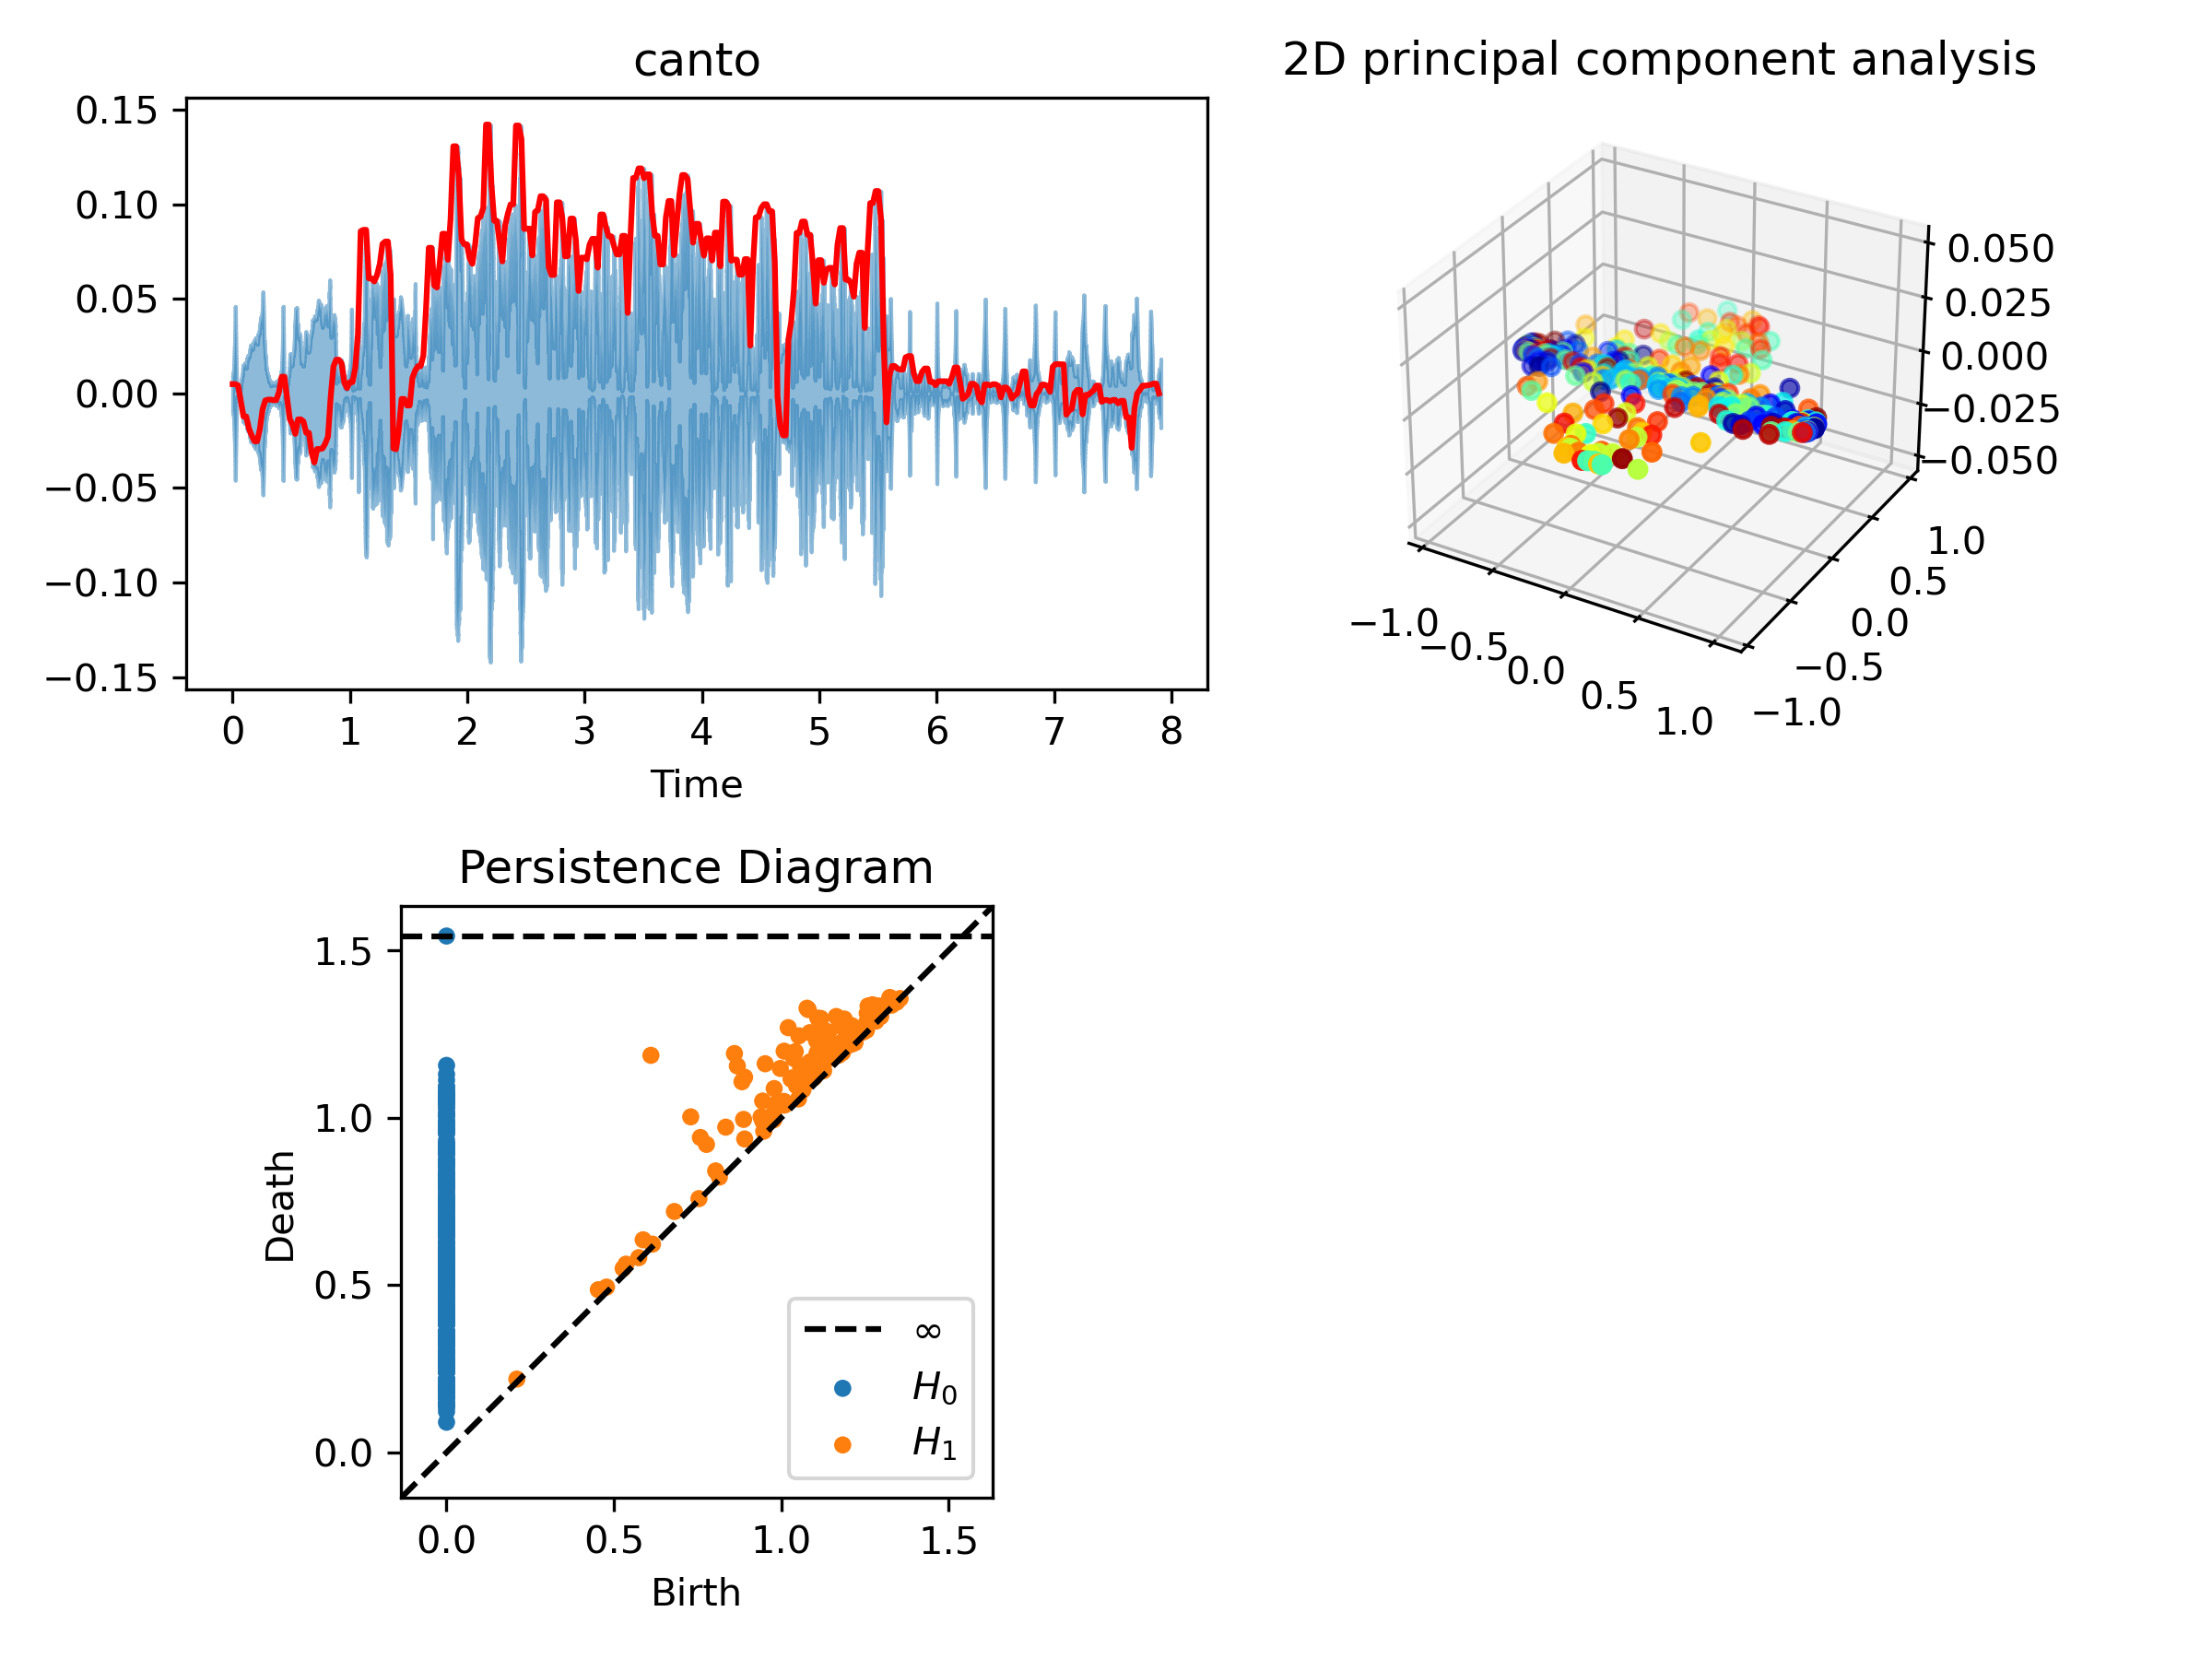

'\n#Note that dim*Tau here spans a half a second of audio, \n#since Fs is the sample rate\ndim = round(sr/200)\nTau = 100\ndT = sr/100\n\nY = getSlidingWindowInteger(song[0:sr*3], dim, Tau, dT)\nprint("Y.shape = ", Y.shape)\n#Mean-center and normalize\nY = Y - np.mean(Y, 1)[:, None]\nY = Y/np.sqrt(np.sum(Y**2, 1))[:, None]\n\nPDs = ripser(Y, maxdim=1)[\'dgms\']\npca = PCA()\nZ = pca.fit_transform(Y)\n\nplt.figure(figsize=(8, 4))\nplt.subplot(121)\nplt.title("2D PCA")\nplt.scatter(Z[:, 0], Z[:, 1])\nplt.subplot(122)\nplot_diagrams(PDs)\nplt.title("Persistence Diagram")\nplt.show()\n\n'

In [21]:
def on_value_change(change):
    
    execute_computation()
    

maximo= round(sr/200)  

print(maximo)

dimslider = widgets.IntSlider(min=1,max=maximo,value=maximo,description='Dimension:',continuous_update=False)
dimslider.observe(on_value_change, names='value')

Tauslider = widgets.FloatSlider(min=0.1,max=100,step=0.1,value=1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')

display(widgets.HBox(( dimslider,Tauslider)))


#fig = plt.figure(figsize=(9.5, 4))

def execute_computation():
    
    plt.clf()
    # Step 1: Setup the signal
    #T = 40 # The period in number of samples
    #NPeriods = 4 # How many periods to go through
    #N = T*NPeriods # The total number of samples
    #t = np.linspace(0, 2*np.pi*NPeriods, N+1)[0:N] # Sampling indices in time
    #x = np.cos(t) # The final signal
    #x += noiseampslider.value * noise[:len(x)]
    
    # Step 2: Do a sliding window embedding
    dim = dimslider.value
    Tau = Tauslider.value
    #dT = 0.5
    #X = getSlidingWindow(x, dim, Tau, dT)
    
    #Note that dim*Tau here spans a half a second of audio, 
    #since Fs is the sample rate
    #dim = round(sr/200)
    #Tau = 100
    dT = sr/100
    extent = Tau*dim
    
    
    Y = getSlidingWindowInteger(song[0:sr*3], dim, Tau, dT)
    print("Y.shape = ", Y.shape)
    
    
    #Mean-center and normalize
    Y = Y - np.mean(Y, 1)[:, None]
    Y = Y/np.sqrt(np.sum(Y**2, 1))[:, None]
    
    
    # Step 3: Do Rips Filtration
    PDs = ripser(Y, maxdim=1)['dgms']
    pca = PCA()
    Z = pca.fit_transform(Y)
    
    #Plot original signal, 2-D projection, and the persistence diagram
    fig = plt.figure(figsize=(8, 6))



    plt.subplot(221)
    librosa.display.waveshow(song, alpha=0.5)
    plt.plot(t, ae_ave, color="r")
    plt.title("canto")
    
    
    ax2=plt.subplot(222,projection = '3d')
    #c = plt.get_cmap('jet')
    #C = c(np.array(np.round(np.linspace(0, 255, Y.shape[0])), dtype=np.int32))
    #C = C[:, 0:3]
    #plt.title("2D PCA")
   # plt.scatter(Z[:, 0], Z[:, 1],c=C)
    
    c = plt.get_cmap('jet')
    C = c(np.array(np.round(np.linspace(0, 255, Y.shape[0])), dtype=np.int32))
    C = C[:, 0:3]
    
    #ax2 = plt.subplot(gs[:,1],projection='3d')
    ax2.set_title("2D principal component analysis")
    ax2.scatter(Z[:, 0], Z[:, 1],c=C)
    
    
    plt.subplot(223)
    plot_diagrams(PDs)
    plt.title("Persistence Diagram")    
    

    # Step 4: Perform PCA down to 2D for visualization
    #pca = PCA(n_components = 2)
    #Y = pca.fit_transform(X)
    #eigs = pca.explained_variance_
    
    #Step 5: Plot original signal, 2-D projection, and the persistence diagram
    #gs = gridspec.GridSpec(2, 2)
    #ax = plt.subplot(gs[0,0])
    #ax.plot(x)
    #ax.set_ylim((2*min(x), 2*max(x)))
    #ax.set_title("Original Signal")
    #ax.set_xlabel("Sample Number")
    #yr = np.max(x)-np.min(x)
    #yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
    #ax.plot([extent, extent], yr, 'r')
    #ax.plot([0, 0], yr, 'r')     
    #ax.plot([0, extent], [yr[0]]*2, 'r')
    #ax.plot([0, extent], [yr[1]]*2, 'r')

    #ax2 = plt.subplot(gs[1,0])
    #plot_diagrams(PDs)
    #plt.title("Max Persistence = %.3g"%np.max(I[:, 1] - I[:, 0]))
    
    #ax3 = plt.subplot(gs[:,1])
    #ax2.scatter(Y[:, 0], Y[:, 1])
    #plt.axis('equal')
    #plt.title("2-D PCA, Eigenvalues: %.3g, %.3g "%(eigs[0],eigs[1]))
    
    plt.tight_layout()

    
execute_computation()

"""
#Note that dim*Tau here spans a half a second of audio, 
#since Fs is the sample rate
dim = round(sr/200)
Tau = 100
dT = sr/100

Y = getSlidingWindowInteger(song[0:sr*3], dim, Tau, dT)
print("Y.shape = ", Y.shape)
#Mean-center and normalize
Y = Y - np.mean(Y, 1)[:, None]
Y = Y/np.sqrt(np.sum(Y**2, 1))[:, None]

PDs = ripser(Y, maxdim=1)['dgms']
pca = PCA()
Z = pca.fit_transform(Y)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("2D PCA")
plt.scatter(Z[:, 0], Z[:, 1])
plt.subplot(122)
plot_diagrams(PDs)
plt.title("Persistence Diagram")
plt.show()

"""

- Persistence diagrams are a summary for the geometry/topology of the sliding window embedding
- Maximum persistence is maximized when window size is close to period
- Surprisingly, the maximum persistence of signals with harmonics depends on the field of coefficients

Unfortunately, the sample rate is just to high and the signal is just too messy for this algorithm to work. We will have to do some more sophisticated preprocessing before applying the algorithm.
One way to deal with the fact that music is both messy and at a high sampling rate is to derive something called the "audio novelty function," which is designed explicitly to pick up on rhythmic events. To see how it's motivated, let's look at the audio spectrogram of this song


In [22]:
from analysis.musicfeatures import Features, Num, normalize

ModuleNotFoundError: No module named 'analysis'

In [23]:
from MusicFeatures import *

#Compute the power spectrogram and audio novelty function
winSize = 512
hopSize = 256
plt.figure()
(S, novFn) = getAudioNoveltyFn(X, Fs, winSize, hopSize)
plt.imshow(np.log(S.T), cmap = 'afmhot', aspect = 'auto')
plt.title('Log-frequency power spectrogram')
plt.show()

ModuleNotFoundError: No module named 'MusicFeatures'